### Importing the data

In [51]:
import pandas as pd
dataset = pd.read_csv("Fortune.csv",encoding='latin-1')

#### Getting intuition of the dataset

In [52]:
dataset.head()

,Rank,Company Name,Number of Employees,Previous Rank,Revenues,Revenue Change,Profits,Profit Change,Assets,Market Value
0,1,Walmart,"23,00,000",1.0,"$4,85,873",0.8%,"$13,643.0",-7.2%,"$1,98,825","$2,18,619"
1,2,Berkshire Hathaway,"3,67,700",4.0,"$2,23,604",6.1%,"$24,074.0",0.0%,"$6,20,854","$4,11,035"
2,3,Apple,"1,16,000",3.0,"$2,15,639",-7.7%,"$45,687.0",-14.4%,"$3,21,686","$7,53,718"
3,4,Exxon Mobil,"72,700",2.0,"$2,05,004",-16.7%,"$7,840.0",-51.5%,"$3,30,314","$3,40,056"
4,5,McKesson,"68,000",5.0,"$1,92,487",6.2%,"$2,258.0",53.0%,"$56,563","$31,439"


#### Getting information about the data types in the dataset

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 500 non-null    int64  
 1   Company Name         500 non-null    object 
 2   Number of Employees  500 non-null    object 
 3   Previous Rank        492 non-null    float64
 4   Revenues             500 non-null    object 
 5   Revenue Change       500 non-null    object 
 6   Profits              500 non-null    object 
 7   Profit Change        500 non-null    object 
 8   Assets               500 non-null    object 
 9   Market Value         500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


#### Removing special characters using .replace() function

In [54]:
dict = {'%':'',',':''}
dataset = dataset.replace(dict ,regex=True)

In [55]:
dataset.head()

,Rank,Company Name,Number of Employees,Previous Rank,Revenues,Revenue Change,Profits,Profit Change,Assets,Market Value
0,1,Walmart,2300000,1.0,$485873,0.8,$13643.0,-7.2,$198825,$218619
1,2,Berkshire Hathaway,367700,4.0,$223604,6.1,$24074.0,0.0,$620854,$411035
2,3,Apple,116000,3.0,$215639,-7.7,$45687.0,-14.4,$321686,$753718
3,4,Exxon Mobil,72700,2.0,$205004,-16.7,$7840.0,-51.5,$330314,$340056
4,5,McKesson,68000,5.0,$192487,6.2,$2258.0,53.0,$56563,$31439


#### Removing special characters using str.replace() function

In [56]:
str_cols = ['Revenues','Profits','Assets','Market Value']    # specify columns you want to replace
dataset[str_cols]=dataset[str_cols].apply(lambda x: x.str.replace('$',''))

In [57]:
dataset.head()

,Rank,Company Name,Number of Employees,Previous Rank,Revenues,Revenue Change,Profits,Profit Change,Assets,Market Value
0,1,Walmart,2300000,1.0,485873,0.8,13643.0,-7.2,198825,218619
1,2,Berkshire Hathaway,367700,4.0,223604,6.1,24074.0,0.0,620854,411035
2,3,Apple,116000,3.0,215639,-7.7,45687.0,-14.4,321686,753718
3,4,Exxon Mobil,72700,2.0,205004,-16.7,7840.0,-51.5,330314,340056
4,5,McKesson,68000,5.0,192487,6.2,2258.0,53.0,56563,31439


#### Dropping the Company Name

In [58]:
dataset = dataset.drop(['Company Name'],axis =1)

#### Converting entire dataset into numeric  dataset

In [59]:
dataset = dataset.apply(pd.to_numeric,errors='coerce')
dataset = dataset.fillna(0)

## Visualising the Data

#### Plotting Revenues vs Profits

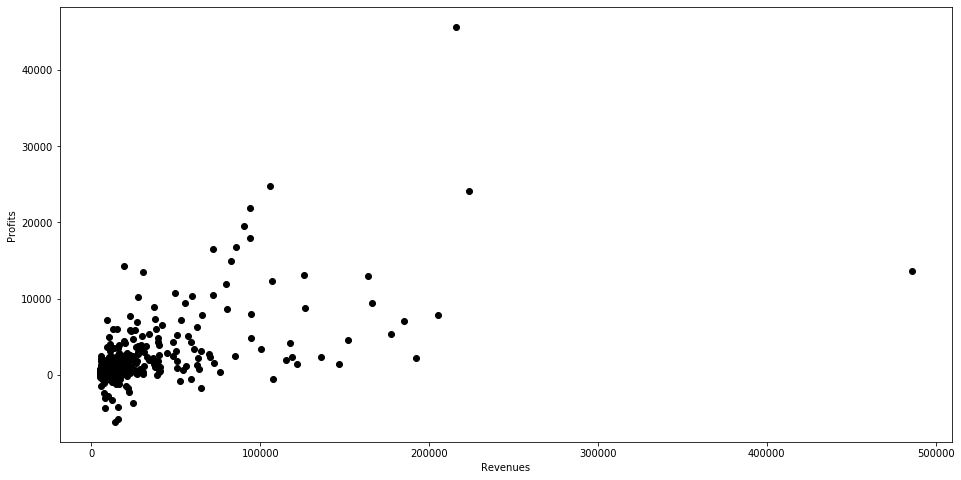

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.scatter(
    dataset['Revenues'],
    dataset['Profits'],
    c='black'
)
plt.xlabel('Revenues')
plt.ylabel("Profits")
plt.show()

##### Removing detected outlier

In [61]:
#Replacing Outlier in the Profit&Revenues with the maximum value 
dataset['Profits']=dataset['Profits'].replace(to_replace=45687.0,value=36000.0)
dataset['Revenues']=dataset['Revenues'].replace(to_replace=485873,value=200000)


#### Number of Employees vs Profits

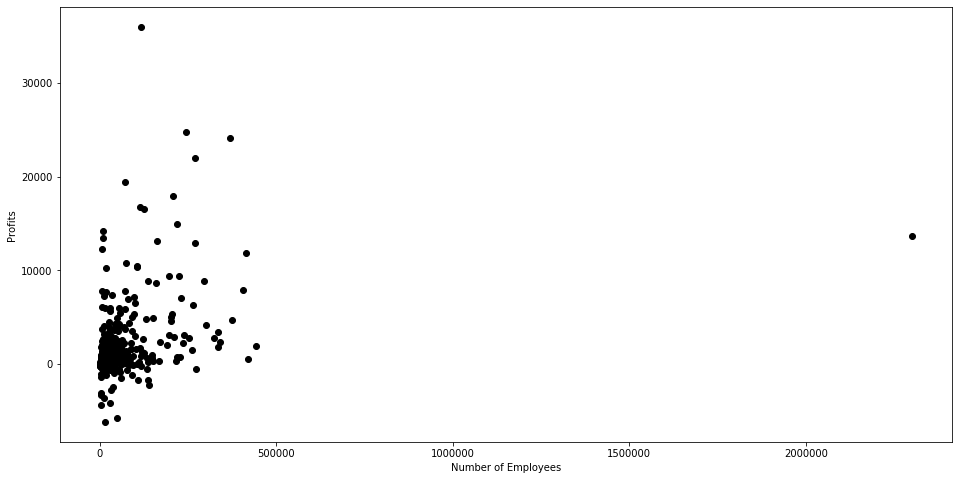

In [62]:
plt.figure(figsize=(16, 8))
plt.scatter(
    dataset['Number of Employees'],
    dataset['Profits'],
    c='black'
)
plt.xlabel('Number of Employees')
plt.ylabel("Profits")
plt.show()

In [63]:
#Replacing outlier with the maximum value 
dataset['Number of Employees']=dataset['Number of Employees'].replace(to_replace=2300000,value=490000)

#### Plotting Assets vs Profits

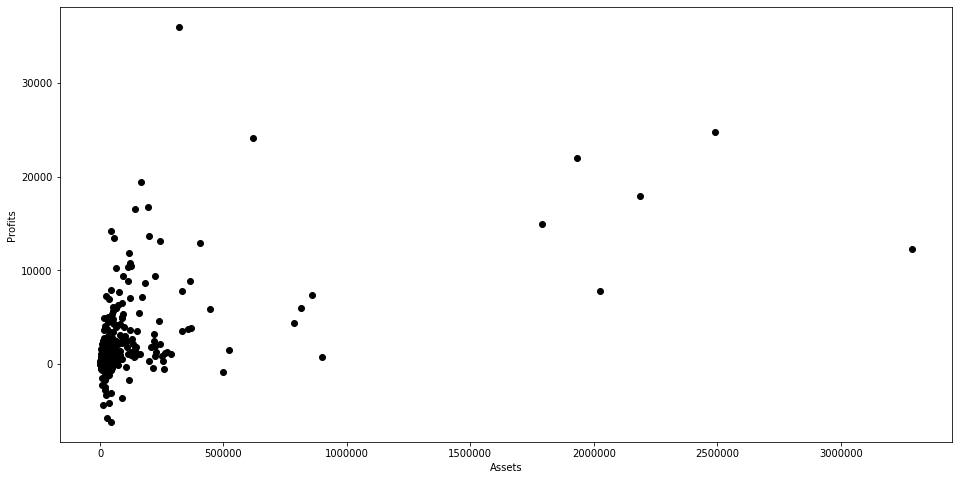

In [64]:
plt.figure(figsize=(16, 8))
plt.scatter(
    dataset['Assets'],
    dataset['Profits'],
    c='black'
)
plt.xlabel('Assets')
plt.ylabel("Profits")
plt.show()

In [65]:
#Removing outlier by Replacing with maximum value
dataset['Assets']=dataset['Assets'].replace(to_replace=3287968,value=2500000)

#### Plotting Market Value vs Profits

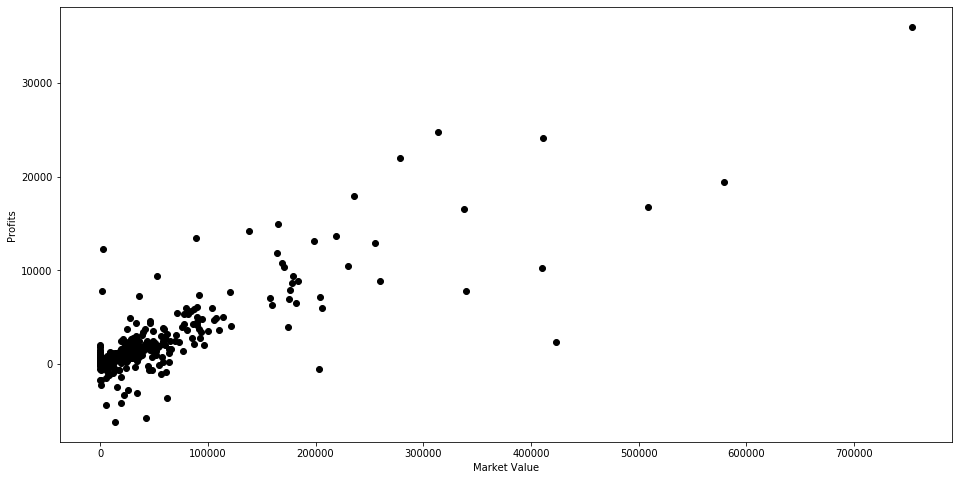

In [66]:
plt.figure(figsize=(16, 8))
plt.scatter(
    dataset['Market Value'],
    dataset['Profits'],
    c='black'
)
plt.xlabel('Market Value')
plt.ylabel("Profits")
plt.show()

In [67]:
# Removing Outlier by replacing with the maximum value
dataset['Market Value']=dataset['Market Value'].replace(to_replace=753718.0,value=600000.0)

#### Plotting Profit Change vs Profits

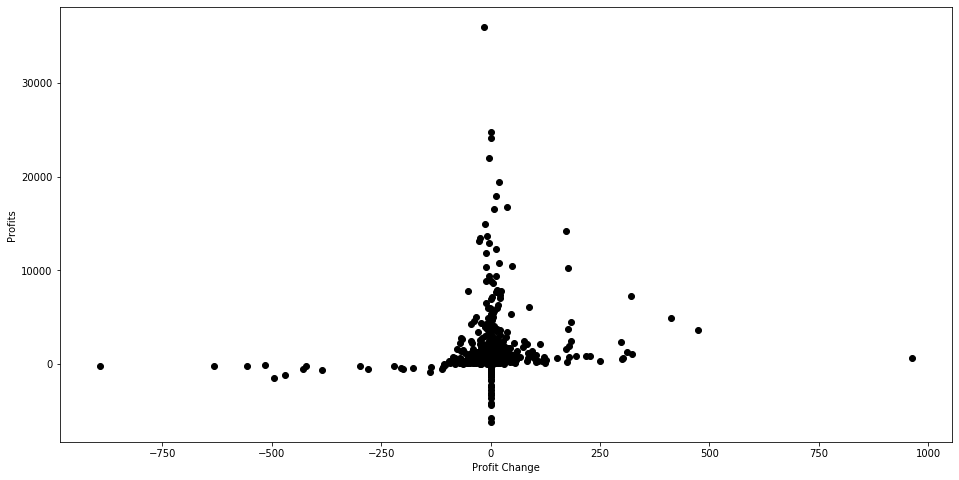

In [68]:
plt.figure(figsize=(16, 8))
plt.scatter(
    dataset['Profit Change'],
    dataset['Profits'],
    c='black'
)
plt.xlabel('Profit Change')
plt.ylabel("Profits")
plt.show()

#### Plotting Rank vs Profits

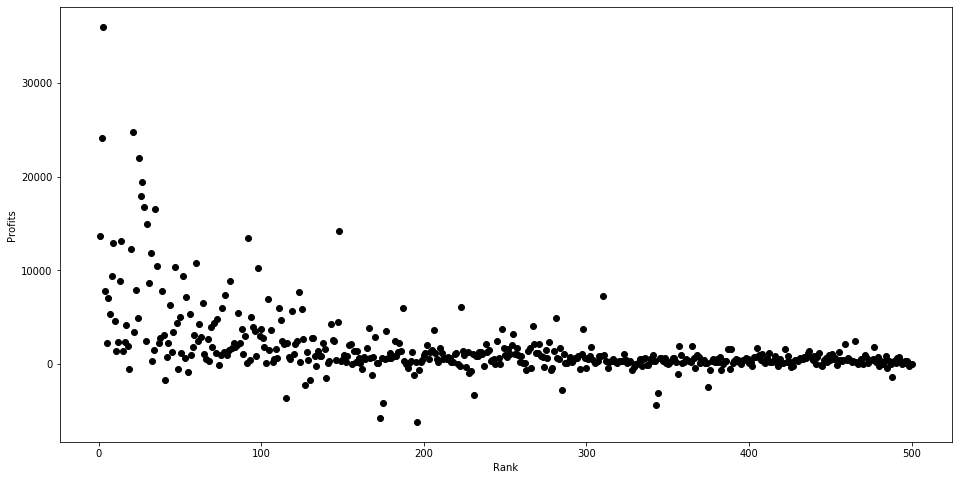

In [69]:
plt.figure(figsize=(16, 8))
plt.scatter(
    dataset['Rank'],
    dataset['Profits'],
    c='black'
)
plt.xlabel('Rank')
plt.ylabel("Profits")
plt.show()

#### Storing all the feautres as Independent Variables to X and Dependent to the Y

In [70]:
X = dataset.drop(['Profits'],axis=1)
y= dataset['Profits']

In [71]:
X.head()

,Rank,Number of Employees,Previous Rank,Revenues,Revenue Change,Profit Change,Assets,Market Value
0,1,490000,1.0,200000,0.8,-7.2,198825,218619.0
1,2,367700,4.0,223604,6.1,0.0,620854,411035.0
2,3,116000,3.0,215639,-7.7,-14.4,321686,600000.0
3,4,72700,2.0,205004,-16.7,-51.5,330314,340056.0
4,5,68000,5.0,192487,6.2,53.0,56563,31439.0


#### Importing statsmodel 

In [72]:
import statsmodels.api as sm

#### Checking the summary of our model

In [73]:
X1 = sm.add_constant(X)
est = sm.OLS(y, X1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Profits   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     235.1
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          1.52e-162
Time:                        15:30:05   Log-Likelihood:                -4428.6
No. Observations:                 500   AIC:                             8875.
Df Residuals:                     491   BIC:                             8913.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -506.8942    

#### Removing variable with High P-Value and checking the results

In [76]:
X1= dataset.drop(['Profits','Number of Employees'],axis=1)
y1= dataset['Profits']

In [77]:
X2 = sm.add_constant(X1)
est1 = sm.OLS(y1, X2)
est3 = est1.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                Profits   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     267.3
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          3.68e-163
Time:                        15:34:35   Log-Likelihood:                -4430.1
No. Observations:                 500   AIC:                             8876.
Df Residuals:                     492   BIC:                             8910.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -397.7255    249.741     -1.

In [78]:
X2= dataset.drop(['Profits','Number of Employees','Rank'],axis=1)
y2= dataset['Profits']

In [79]:
X3 = sm.add_constant(X2)
est2 = sm.OLS(y2, X3)
est4 = est2.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:                Profits   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     312.4
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          2.11e-164
Time:                        15:36:32   Log-Likelihood:                -4430.1
No. Observations:                 500   AIC:                             8874.
Df Residuals:                     493   BIC:                             8904.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -426.1451    233.981     -1.

In [80]:
X3= dataset.drop(['Profits','Number of Employees','Rank','Revenue Change'],axis=1)
y3= dataset['Profits']

In [81]:
X4 = sm.add_constant(X3)
est3 = sm.OLS(y3, X4)
est5 = est3.fit()
print(est5.summary())

                            OLS Regression Results                            
Dep. Variable:                Profits   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     375.5
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          1.11e-165
Time:                        15:38:15   Log-Likelihood:                -4430.2
No. Observations:                 500   AIC:                             8872.
Df Residuals:                     494   BIC:                             8898.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -403.2130    225.525     -1.788

In [85]:
X4= dataset.drop(['Profits','Number of Employees','Rank','Revenue Change','Previous Rank'],axis=1)
y4= dataset['Profits']

In [86]:
X5 = sm.add_constant(X4)
est4 = sm.OLS(y4, X4)
est6 = est4.fit()
print(est6.summary())

                                 OLS Regression Results                                
Dep. Variable:                Profits   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              594.4
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                   1.29e-187
Time:                        15:42:44   Log-Likelihood:                         -4433.3
No. Observations:                 500   AIC:                                      8875.
Df Residuals:                     496   BIC:                                      8891.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [87]:
final_X= dataset.drop(['Profits','Number of Employees','Rank','Revenue Change','Previous Rank','Profit Change'],axis=1)
final_y= dataset['Profits']

In [88]:
fin = sm.add_constant(final_X)
final_est = sm.OLS(final_y, fin)
fin_est = final_est.fit()
print(fin_est.summary())

                            OLS Regression Results                            
Dep. Variable:                Profits   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     619.6
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          2.68e-167
Time:                        15:44:33   Log-Likelihood:                -4432.9
No. Observations:                 500   AIC:                             8874.
Df Residuals:                     496   BIC:                             8891.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -223.5870     94.862     -2.357   